In [60]:
from ray.tune.analysis import Analysis
from matplotlib import pyplot as plt
import plotly.express as px

In [61]:
analysis = Analysis("/home/sergei/ray_results/fixed_vs_learned/")

In [62]:
target = 'policy_reward_mean/learned00'

In [63]:
df = analysis.dataframe(metric=target, mode='max')

In [64]:
df.columns

Index(['episode_reward_max', 'episode_reward_min', 'episode_reward_mean',
       'episode_len_mean', 'episodes_this_iter', 'num_healthy_workers',
       'timesteps_total', 'done', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_this_iter_s',
       'time_total_s', 'pid', 'hostname', 'node_ip', 'time_since_restore',
       'timesteps_since_restore', 'iterations_since_restore', 'trial_id',
       'experiment_tag', 'policy_reward_min/learned00',
       'policy_reward_min/learned01', 'policy_reward_max/learned00',
       'policy_reward_max/learned01', 'policy_reward_mean/learned00',
       'policy_reward_mean/learned01', 'hist_stats/episode_reward',
       'hist_stats/episode_lengths', 'hist_stats/policy_learned00_reward',
       'hist_stats/policy_learned01_reward', 'sampler_perf/mean_env_wait_ms',
       'sampler_perf/mean_processing_ms', 'sampler_perf/mean_inference_ms',
       'timers/sample_time_ms', 'timers/sample_throughput',
       'timers

In [65]:
for k in df.columns:
#     if k.startswith('episode'):
#         del df[k]
    if not (k.startswith('config') or k == target):
        del df[k]

In [14]:
df = df.sort_values('policy_reward_mean/learned00', ascending=False)

(array([46., 30.,  9.,  8.,  5.,  1.,  0.,  0.,  0.,  1.]),
 array([0.3       , 0.65309524, 1.00619048, 1.35928571, 1.71238095,
        2.06547619, 2.41857143, 2.77166667, 3.1247619 , 3.47785714,
        3.83095238]),
 <a list of 10 Patch objects>)

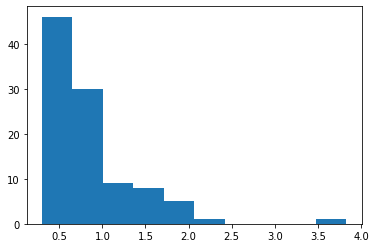

In [15]:
plt.hist(df[target])

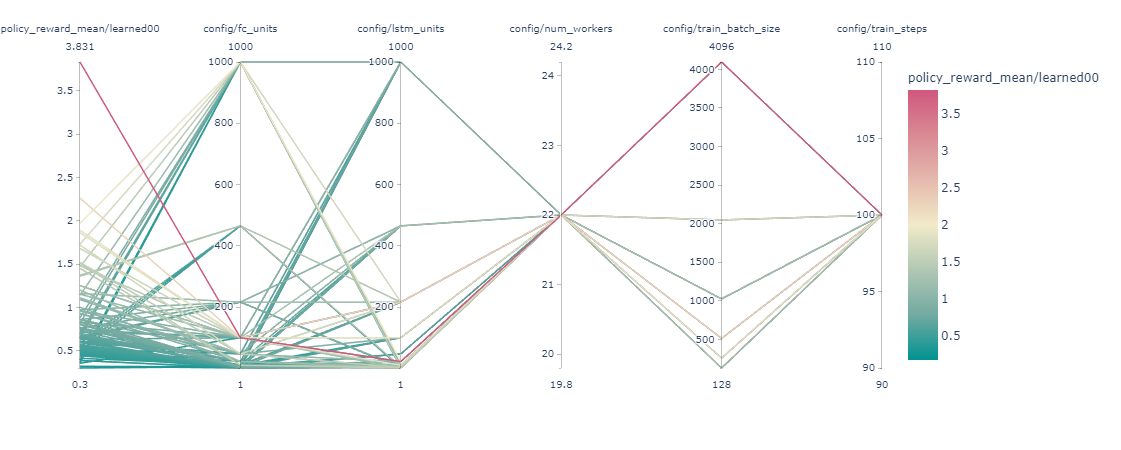

In [16]:
fig = px.parallel_coordinates(df, color=target,
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

In [17]:
df.iloc[0]

policy_reward_mean/learned00        3.83095
config/fc_units                         100
config/lstm_units                        22
config/num_workers                       22
config/train_batch_size                4096
config/train_policies           [learned00]
config/train_steps                      100
Name: 41, dtype: object

In [18]:
df

,policy_reward_mean/learned00,config/fc_units,config/lstm_units,config/num_workers,config/train_batch_size,config/train_policies,config/train_steps
41,3.830952,100,22,22,4096,[learned00],100
91,2.260000,100,216,22,512,[learned00],100
31,1.970000,1000,22,22,512,[learned00],100
9,1.890000,100,100,22,256,[learned00],100
64,1.860000,100,10,22,512,[learned00],100
...,...,...,...,...,...,...,...
88,0.360000,1000,1,22,256,[learned00],100
98,0.354762,100,1000,22,4096,[learned00],100
42,0.319048,5,47,22,4096,[learned00],100
94,0.319048,1,3,22,4096,[learned00],100
